# Efektywne programowanie w języku Python 

## wykład 8

![alt text](images/numpy_project_page.jpg "numpy")

## Wydajne obliczenia numeryczne

Standardowe typy danych i procedury Pythona nie nadają się do poważnych zastosowań numerycznych. Konieczne było opracowanie zoptymalizowanych pod względem typowych operacji numerycznych typów danych i procedur. Stworzony został **Numerical Python**, zwany w skrócie **NumPy**. Podczas rozwoju tego pakietu kierowano się podejściem zastosowanym w takich językach jak Basis, MATLAB, rodzina języków APL, FORTRAN i innych. Tak więc NumPy jest biblioteką Pythona służącą do obliczeń naukowych. Dostarcza ona listę matematycznych funkcji użytecznych w takich zagadnieniach jak:
- algebra liniowa,
- transformacje Fouriera,
- generowanie liczb losowych,
- oraz wszystkie operacje na tablicach i macierzach, które są podstawowymi obiektami w Numpy.

W numpy znajdziemy, m.in.
- `ndarray` - wydajną implementacjeę tablic wielowymiarowych umozliwiające szybkie wykonywanie operacji arytmetycznych,
- funkcje matematyczne przeznaczone do wykonywania szybkich operacji na calych tablicach bez potrzeby korzystania z pętli,
- narzędzia przeznaczone do zapisu i odczytu danych tablicowych.

In [2]:
import numpy
# lub
import numpy as np 

# Przyklad na rozgrzewkę

In [3]:
import numpy as np
a_arr = np.arange(1_000_000)
a_list = list(range(1_000_000))

In [4]:
%%timeit
for _ in range(10):
    a_arr2 = a_arr * 2

9.63 ms ± 60 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
%%timeit
for _ in range(10):
    a_list2 = [x * 2 for x in a_list]

368 ms ± 12.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Generalnie jest of 10 do 1000 razy szybciej, jeśli umiemy numpy.

In [6]:
import numpy as np

In [7]:
A = np.random.randn(20, 20)

In [8]:
%%timeit
np.power(A, 8)

5.64 μs ± 122 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [9]:
%%timeit
A ** 8

5.67 μs ± 82.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [10]:
%%timeit
A*A*A*A*A*A*A*A

3.56 μs ± 95.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Tworzenie macierzy

Do stworzenia tablicy jedno-, dwu- i wielowymiarowej używamy funkcji **array** - przyjmuje ona dowolny obiekt będący sekwencją i generuje nowa tablice  numpy

In [11]:
x = np.array([1,2,3]) # tablica jednowymiarowa
A = np.array([[1,2,3] , [4,5,6]]) # tablica dwuwymiarowa
B = np.array( [[[1,1,1],[1,1,1]], [[2,2,2],[2,2,2]]]) # wielowymiarowa

print('x=',  x, '\n')
print('A=', A, '\n')
print('B=', B, '\n')

x= [1 2 3] 

A= [[1 2 3]
 [4 5 6]] 

B= [[[1 1 1]
  [1 1 1]]

 [[2 2 2]
  [2 2 2]]] 



Tablica ma wymiar i kasztalt

In [12]:
x = np.array([[1,2,3],[2,3,4]]) # tablica dwuwymiarowa

In [13]:
x.ndim

2

In [14]:
x.shape

(2, 3)

Przy tworzeniu tablicy istnieje możliwość zadeklarowania jej typu:

In [15]:
z = np.array( [[1,0], [0,1]], dtype=complex) # tablica liczb zespolonych
print(z)

[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


Jesli typ nie zostanie okreslony, numpy zrobi to za nas, informacje te zostaną sapisane w polu `dtype`

In [16]:
z.dtype

dtype('complex128')

Do tworzenia tablicy jednowymiarowej (wektora) składającego się z elementów z danego zakresu używamy polecenia **arange(start, stop, krok)**:

In [17]:
print(np.arange(10), '\n')
print(np.arange(0, 10, 2), '\n')
print(np.arange(0., 10, 0.5))

[0 1 2 3 4 5 6 7 8 9] 

[0 2 4 6 8] 

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]


Jeśli chcemy wygenerować tablicę o określonej liczbie z danego przedziału, używamy funkcji linspace:

In [18]:
print(np.linspace(0., 10., 3), '\n')
print(np.linspace(0., 1., 5))

[ 0.  5. 10.] 

[0.   0.25 0.5  0.75 1.  ]


Biblioteka Numpy oferuje wiele możliwości budowania typowych tablic:

In [19]:
print(np.ones((3,3)), '\n') # dwuwymiarowa tablica (3x3) wypełniona jedynkami
print(np.zeros((3,2)), '\n') # dwuwymiarowa tablica (3x2) wypełniona zerami
print(np.eye(4)) # macierz jednostkowa 4x4

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[[0. 0.]
 [0. 0.]
 [0. 0.]] 

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Korzystając z powyższych funkcji możemy w łatwy sposób tworzyć dowolne macierze, zmieniając ich rozmiary.

In [20]:
print(np.arange(15).reshape(5,3), '\n')
print(np.linspace(0., 1, 15).reshape(5,3))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]] 

[[0.         0.07142857 0.14285714]
 [0.21428571 0.28571429 0.35714286]
 [0.42857143 0.5        0.57142857]
 [0.64285714 0.71428571 0.78571429]
 [0.85714286 0.92857143 1.        ]]


## Uwaga:
Metoda `np.empty` może zwrócić coś innego niż macierz z zerami więc nie zakładamy, że zwrac taką macierz.

In [21]:
np.empty((10, 10))

array([[6.89899480e-310, 6.89899480e-310, 4.19553045e-315,
        4.19553045e-315, 1.90979622e-313, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.0

## Metody `_like` 
Metody `ones_like`, `zero_like` itd. tworzą tablice o takim samy rozmiarze i wypełniają ją odpowiednimi wartościami

In [22]:
x = np.linspace(0., 1, 12).reshape(4,3)
print(x)

[[0.         0.09090909 0.18181818]
 [0.27272727 0.36363636 0.45454545]
 [0.54545455 0.63636364 0.72727273]
 [0.81818182 0.90909091 1.        ]]


In [23]:
np.ones_like(x)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

# Typy danych

| Data type |Description |
|---|---|
| bool_	| Boolean (True or False) stored as a byte|
|int_	|Default integer type (same as C long; normally either int64 or int32)|
|intc	|Identical to C int (normally int32 or int64)|
|intp	|Integer used for indexing (same as C ssize_t; normally either int32 or int64)|
|int8	|Byte (-128 to 127)|
|int16	|Integer (-32768 to 32767)|
|int32|	Integer (-2147483648 to 2147483647)|
|int64|	Integer (-9223372036854775808 to 9223372036854775807)|
|uint8|	Unsigned integer (0 to 255)|
|uint16|	Unsigned integer (0 to 65535)|
|uint32|Unsigned integer (0 to 4294967295)|
|uint64	|Unsigned integer (0 to 18446744073709551615)|
|float_	|Shorthand for float64.|
|float16|	Half precision float: sign bit, 5 bits exponent, 10 bits mantissa|
|float32|	Single precision float: sign bit, 8 bits exponent, 23 bits mantissa|
|float64	|Double precision float: sign bit, 11 bits exponent, 52 bits mantissa|
|complex_|Shorthand for complex128.|
|complex64	|Complex number, represented by two 32-bit floats|
|complex128|	Complex number, represented by two 64-bit floats|

https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html

In [24]:
arr = np.array([1, 2, 3, 4])
arr.dtype

dtype('int64')

In [25]:
arr2 = arr.astype(np.float64)
arr2.dtype

dtype('float64')

In [26]:
print(arr2)

[1. 2. 3. 4.]


In [27]:
arr = np.array(['12', '-0.1', '2.3'])

In [28]:
arr

array(['12', '-0.1', '2.3'], dtype='<U4')

In [29]:
arr.astype(float)

array([12. , -0.1,  2.3])

## Operacje na indeksach

In [30]:
x = np.arange(15)
print(x, '\n')
print(x[3], '\n')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] 

3 



In [31]:
A = np.arange(20).reshape(5,4)
print(A, '\n')
print(A[2, 3])
print(A[2][3], '\n') # równoważnie
print(A[2], '\n') # trzeci wiersz
print(A[:, 2]) # trzecia kolumna

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]] 

11
11 

[ 8  9 10 11] 

[ 2  6 10 14 18]


Aby wyświetlić fragment tablicy od  `n−1`  do `m−1`  elementów używamy składni: `tablica[n:m]`, analogicznie aby wyświetlić elementy tablicy pomiędzy  `n−1` , a  `m−1`  przesuwając się o wartość  `k`  używamy składni `tablica[n:m:k]`.

In [32]:
x = np.arange(15)
print(x, '\n')
print(x[3:11], '\n')
print(x[3:11:2], '\n')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] 

[ 3  4  5  6  7  8  9 10] 

[3 5 7 9] 



In [33]:
A = np.arange(20).reshape(5,4)
print(A[2:4], '\n') # wiersze od trzeciego do czwartego
print(A[:,2:4], '\n') # trzecia i czwarta kolumnę
print(A[:,[2,3]]) # równoważnie

[[ 8  9 10 11]
 [12 13 14 15]] 

[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]
 [18 19]] 

[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]
 [18 19]]


Tablice można też budować w oparciu o już istniejące:

In [34]:
A = np.arange(20).reshape(5,4)
print(A, '\n')

B = A[2:4, 2:]
print(B)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]] 

[[10 11]
 [14 15]]


## Zmiana rozmiaru, kształtu tablicy

Do zmiany rozmiaru tablicy już utworzonej służy funkcja: **reshape**. Operacja ta nie zmieni zawartości oryginalnej tablicy, pokaże jedynie jej elementy w zadanej postaci.

In [35]:
A = np.arange(8)
print(A,'\n')
print(A.reshape((2, 4)), '\n')
print(A)

[0 1 2 3 4 5 6 7] 

[[0 1 2 3]
 [4 5 6 7]] 

[0 1 2 3 4 5 6 7]


Aby zmienić kształt tablicy za pomocą funkcji reshape możemy zrobić tak:

In [36]:
A = np.arange(8)
print(A,'\n')
A2 = A.reshape((2, 4))
print(A2)
print(A)

[0 1 2 3 4 5 6 7] 

[[0 1 2 3]
 [4 5 6 7]]
[0 1 2 3 4 5 6 7]


lub użyć funkcję resize:

In [37]:
A = np.arange(8)
print(A,'\n')
A.resize(2, 4)
# print(A.resize(2, 4), '\n')
print(A)

[0 1 2 3 4 5 6 7] 

[[0 1 2 3]
 [4 5 6 7]]


Do sprawdzenia wymiaru tablicy służy pole **shape**:

In [38]:
A = np.arange(20).reshape(5,4)
print(A.shape, '\n') # wymiar tablicy
print(A.shape[0], '\n') # pierwszy wymiar
print(A.shape[1], '\n') # drugi wymiar
print(A.size) # liczba wszystkich elementów w tablicy 

(5, 4) 

5 

4 

20


Transpozycja macierzy:

In [39]:
A = np.arange(8).reshape(2,4)
print(A, '\n')
print(A.T, '\n')
print(np.transpose(A))

[[0 1 2 3]
 [4 5 6 7]] 

[[0 4]
 [1 5]
 [2 6]
 [3 7]] 

[[0 4]
 [1 5]
 [2 6]
 [3 7]]


Podobnie jak przy funkcji `reshape` aby zachować wynik transpozycji macierzy musimy go przypisać do nowej zmiennej.

Aby zmienić tablicę na jednowymiarową, możemy użyć polecenia:

In [40]:
A = np.arange(8).reshape(2,4)
print(A, '\n')
print(np.ravel(A), '\n')
print(A.reshape(-1,))

[[0 1 2 3]
 [4 5 6 7]] 

[0 1 2 3 4 5 6 7] 

[0 1 2 3 4 5 6 7]


## Dodawanie, usuwanie elementów

Do dodania elementu, kolumny lub wiersza do tablicy w ustalonej pozycji/lokalizacji używamy polecenia **insert**:

In [41]:
A = np.array([[1, 1], [2, 2], [3, 3]])
print(A, '\n')
print(np.insert(A, 1, 5), '\n')
print(A, '\n')
print(np.insert(A, 1, 5, axis=1), '\n') # wstawienie drugiej kolumny
print(np.insert(A, 1, [4, 5, 6], axis=1), '\n') # wstawienie drugiej kolumny
print(np.insert(A, 3, 4, axis=0)) # wstawienie wiersza kolumny

[[1 1]
 [2 2]
 [3 3]] 

[1 5 1 2 2 3 3] 

[[1 1]
 [2 2]
 [3 3]] 

[[1 5 1]
 [2 5 2]
 [3 5 3]] 

[[1 4 1]
 [2 5 2]
 [3 6 3]] 

[[1 1]
 [2 2]
 [3 3]
 [4 4]]


https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.insert.html

Aby dodać element(-y) na koniec tablicy należy użyć funkcji **append**:

In [42]:
print(np.append([1, 2, 3], [4, 5, 6]), '\n')
print(np.append([1, 2, 3], [[4, 5, 6], [7, 8, 9]]), '\n')
print(np.append([[1, 2, 3], [4, 5, 6]], [[7, 8, 9]], axis=0))

[1 2 3 4 5 6] 

[1 2 3 4 5 6 7 8 9] 

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Biblioteka NumPy umożliwia nam także usuwanie wybranych elementów, wierszy lub kolumn z tablicy:

In [43]:
A = np.arange(20).reshape(5,4)
print(A, '\n')

print(np.delete(A, 1, axis=0), '\n')
print(A, '\n')
print(np.delete(A, [1, 2], 1), '\n')
print(np.delete(A, [1, 2, 5, 7, 9, 12, 17, 19]))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]] 

[[ 0  1  2  3]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]] 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]] 

[[ 0  3]
 [ 4  7]
 [ 8 11]
 [12 15]
 [16 19]] 

[ 0  3  4  6  8 10 11 13 14 15 16 18]


## Podstawowe operacje na tablicach

Wiele z tych funkcji to operacje element po elemencie

### Dodawanie

In [44]:
x = np.array([1,4,6,2,5])
v = np.arange(5)
print(x+v)
print(np.add(x, v)) # równoważnie
print(x+1, '\n')

A = np.arange(15, 30).reshape((5, 3))
B = np.arange(15).reshape((5, 3))
print(A+B)
print(np.add(A, B))
print(A+5, '\n')

x = np.array([1,2,3])
print(A, '\n')
print(x, '\n')
print(np.add(A, x)) # dodawanie do każdego wiersza wektora x

[1 5 8 5 9]
[1 5 8 5 9]
[2 5 7 3 6] 

[[15 17 19]
 [21 23 25]
 [27 29 31]
 [33 35 37]
 [39 41 43]]
[[15 17 19]
 [21 23 25]
 [27 29 31]
 [33 35 37]
 [39 41 43]]
[[20 21 22]
 [23 24 25]
 [26 27 28]
 [29 30 31]
 [32 33 34]] 

[[15 16 17]
 [18 19 20]
 [21 22 23]
 [24 25 26]
 [27 28 29]] 

[1 2 3] 

[[16 18 20]
 [19 21 23]
 [22 24 26]
 [25 27 29]
 [28 30 32]]


### Odejmowanie

In [45]:
x = np.array([1,4,6,2,5])
v = np.arange(5)
print(x-v)
print(np.subtract(x, v)) # równoważnie
print(x-1, '\n')

A = np.arange(15, 30).reshape((5, 3))
B = np.arange(15).reshape((5, 3))
print(A-B)
print(np.subtract(A, B))
print(A-1, '\n')

x = np.array([1,2,3])
print(np.subtract(A, x)) # odjęcie od każdego wiersza wektora x

[ 1  3  4 -1  1]
[ 1  3  4 -1  1]
[0 3 5 1 4] 

[[15 15 15]
 [15 15 15]
 [15 15 15]
 [15 15 15]
 [15 15 15]]
[[15 15 15]
 [15 15 15]
 [15 15 15]
 [15 15 15]
 [15 15 15]]
[[14 15 16]
 [17 18 19]
 [20 21 22]
 [23 24 25]
 [26 27 28]] 

[[14 14 14]
 [17 17 17]
 [20 20 20]
 [23 23 23]
 [26 26 26]]


### Mnożenie

In [46]:
x = np.array([1,4,6,2,5])
v = np.arange(5) #[0,1,2,3,4]
print(x*5, '\n')
print(np.dot(x,v), '\n') # iloczyn skalarny
print(x*v, '\n') # to nie, mnożony jest element przez element! 

A = np.array([[1, 3], [0, 6]])
print(A*5, '\n')

B = np.array([[-2, 6], [8, -2]])
print(np.dot(A, B), '\n')
print(A*B) # to nie, mnożony jest element przez element! 

[ 5 20 30 10 25] 

42 

[ 0  4 12  6 20] 

[[ 5 15]
 [ 0 30]] 

[[ 22   0]
 [ 48 -12]] 

[[ -2  18]
 [  0 -12]]


# UWAGA NA MNOŻENIE MACIERZY

In [47]:
A = np.matrix( ((2,3), 
                (3, 5)) )
B = np.matrix( ((1,2), 
                (5, -1)) )

print(A * B, '\n')
print(np.dot(A, B))

[[17  1]
 [28  1]] 

[[17  1]
 [28  1]]


### Potęgowanie

In [48]:
x = np.array([1,4,6,2,5])
print(x, '\n')

print(x**2)
print(np.power(x, 2), '\n') # równoważnie

A = np.arange(9).reshape((3, 3))
print(A, '\n')
print(A**2, '\n') # kwadrat elementów tablicy
print(np.power(A, 2)) # równoważnie

[1 4 6 2 5] 

[ 1 16 36  4 25]
[ 1 16 36  4 25] 

[[0 1 2]
 [3 4 5]
 [6 7 8]] 

[[ 0  1  4]
 [ 9 16 25]
 [36 49 64]] 

[[ 0  1  4]
 [ 9 16 25]
 [36 49 64]]


Więcej funkcji można znaleźć tutaj https://docs.scipy.org/doc/numpy/reference/routines.math.html

## Porównania elementów tablic

In [49]:
A = np.arange(5, 20).reshape((5, 3))
B = np.arange(15).reshape((5, 3))

print(A < B, '\n')
print(A == A, '\n')
print(A == 17, '\n')
print(np.any( A > 17 ), '\n') # prawdziwe, jeśli każdy element z osobna spełnia warunek 
print(np.all( A > 17 )) # prawdziwe jeśli wszystkie elementy spełniają warunek

[[False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]] 

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]] 

[[False False False]
 [False False False]
 [False False False]
 [False False False]
 [ True False False]] 

True 

False


## Łączenie i dzielenie tablic

Biblioteka NumPy daje nam narzędzia dzięki, którym możemy łączyć i dzielić tablice.

In [50]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6]])

print(x, '\n')
print(y, '\n')

# łączenie wierszowe
print(np.concatenate((x, y), axis=0), '\n')
print(np.vstack((x,y)), '\n')

# łączenie kolumnowe
print(np.concatenate((x,y.T), axis=1), '\n')
print(np.hstack((x,y.T)))

[[1 2]
 [3 4]] 

[[5 6]] 

[[1 2]
 [3 4]
 [5 6]] 

[[1 2]
 [3 4]
 [5 6]] 

[[1 2 5]
 [3 4 6]] 

[[1 2 5]
 [3 4 6]]


Mamy też możliwość podziału tablicy na podtablice:

In [51]:
x = np.arange(9)
print(x, '\n')
print(np.split(x, 3), '\n') # podział na 3 podtablice
print(np.split(x, [2, 4, 7]), '\n') # podział na 4 podtablice o 
                                # wskazanych początkach

x = x.reshape((3, 3))
print(x, '\n')
print(np.split(x, 3, axis=1), '\n')

# podział ze względu na kolumny
x = np.arange(16.0).reshape(4, 4)
print(x, '\n')
print(np.hsplit(x, 2), '\n')
print(np.hsplit(x, [1, 3]), '\n')

# podział ze względu na wiersze
print(np.vsplit(x, 2), '\n')
print(np.vsplit(x, [1, 3]), '\n')

[0 1 2 3 4 5 6 7 8] 

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8])] 

[array([0, 1]), array([2, 3]), array([4, 5, 6]), array([7, 8])] 

[[0 1 2]
 [3 4 5]
 [6 7 8]] 

[array([[0],
       [3],
       [6]]), array([[1],
       [4],
       [7]]), array([[2],
       [5],
       [8]])] 

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]] 

[array([[ 0.,  1.],
       [ 4.,  5.],
       [ 8.,  9.],
       [12., 13.]]), array([[ 2.,  3.],
       [ 6.,  7.],
       [10., 11.],
       [14., 15.]])] 

[array([[ 0.],
       [ 4.],
       [ 8.],
       [12.]]), array([[ 1.,  2.],
       [ 5.,  6.],
       [ 9., 10.],
       [13., 14.]]), array([[ 3.],
       [ 7.],
       [11.],
       [15.]])] 

[array([[0., 1., 2., 3.],
       [4., 5., 6., 7.]]), array([[ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])] 

[array([[0., 1., 2., 3.]]), array([[ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]]), array([[12., 13., 14., 15.]])] 



## Wybrane metody z algebry linowej

Do części funkcji typowych dla algebry liniowej możemy się odwołać po zaimportowaniu biblioteki **linalg** będącej integralną częścią biblioteki NumPy.

In [52]:
import numpy.linalg as alg 

### Macierz odwrotna

In [53]:
A = np.array([[1., 2.], [3., 4.]])
invA = alg.inv(A)
print(invA)
print(np.dot(A, invA))

[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


### Wyznacznik

In [54]:
print(A)
print(alg.det(A))

[[1. 2.]
 [3. 4.]]
-2.0000000000000004


### Ślad

In [55]:
print(A)
print(np.trace(A))

[[1. 2.]
 [3. 4.]]
5.0


### Norma dla macierz lub wektora

In [56]:
print(alg.norm(A)) # Euklidesowa
print(alg.norm(A, 'fro')) # Frobeniusa https://pl.wikipedia.org/wiki/Norma_macierzowa
print(alg.norm(A, np.inf)) # maksimum

print(alg.norm(A, axis=0)) # wierszy
print(alg.norm(A, axis=1)) # kolumn

5.477225575051661
5.477225575051661
7.0
[3.16227766 4.47213595]
[2.23606798 5.        ]


### Rozwiązywanie układów równań

In [57]:
# 4*x_1 + x_2 = 10
# 3*x_1 = 7
A = np.array([[4,1], [3,0]])
b = np.array([10,7])
print(np.linalg.solve(A, b))

[2.33333333 0.66666667]


### Dekompozycje macierzy

In [58]:
# QR
A = np.array([[0, 1], [1, 1], [1, 1], [2, 1]])
q, r = alg.qr(A)
print(q)
print(r)

[[ 0.          0.8660254 ]
 [-0.40824829  0.28867513]
 [-0.40824829  0.28867513]
 [-0.81649658 -0.28867513]]
[[-2.44948974 -1.63299316]
 [ 0.          1.15470054]]


In [59]:
# SVD
A = np.random.randn(4, 3)
U, s, V = np.linalg.svd(A)
print(U, '\n')
print(s, '\n')
print(V, '\n')

S = np.zeros((4, 3))
S[:3, :3]  = np.diag(s)
print(np.allclose(A, np.dot(U, np.dot(S, V))))

[[ 0.34071559  0.14002024 -0.92964767 -0.00790158]
 [-0.04692482  0.98316972  0.13188145 -0.11739948]
 [-0.56542172 -0.09267409 -0.21446181 -0.79102207]
 [-0.74967274  0.07199403 -0.26901418  0.60036573]] 

[3.20446334 2.47391866 1.31373911] 

[[ 0.17715179 -0.80548744  0.565515  ]
 [-0.54623745 -0.55844772 -0.62430825]
 [-0.81868302  0.19830815  0.53891742]] 

True


In [60]:
# Cholesky A = L*L^T
A = np.array([[1,2],[2,5]])
L = np.linalg.cholesky(A)
print(L, '\n')

print(np.allclose(A, np.dot(L, L.T)))

[[1. 0.]
 [2. 1.]] 

True


## Statystyka

NumPy oferuje dużo możliwości generacji liczb losowych. Poniżej podaję niektóre z nich, więcej można znaleźć tutaj https://docs.scipy.org/doc/numpy/reference/routines.random.html

In [61]:
# macierz losowa 3x2 (liczby z przedziału [0, 1)) 
print(np.random.rand(3,2), '\n')

# macierz losowa 2x3 o elementach z rozkładu N(mu, sigma^2) = N(1, 4)
print(2 * np.random.randn(2, 3) + 1, '\n')

# macierz losowa 3x3 o elementach całkowitych z przedziału [0, 5)
print(np.random.randint(5, size=(3, 3)), '\n')

# losowe wybranie 3 liczb z [0, 1, 2, 3, 4]
print(np.random.choice(5, 3, replace=False), '\n')

[[0.29368322 0.33530325]
 [0.41056843 0.85958068]
 [0.93206961 0.74217866]] 

[[-0.7623766   5.42171227 -0.97409796]
 [ 1.94653277 -1.63370934  2.62555013]] 

[[3 0 1]
 [3 3 2]
 [4 4 2]] 

[0 4 2] 



In [75]:
# rozkład wykładniczy (scale = 1/lambda)
print(numpy.random.exponential(scale=1.0, size=(2, 3)), '\n')

# rozkład geometryczny
print(np.random.geometric(p=0.35, size=(2,4)), '\n')

# rozkład normalny N(mu, sigma)
print(np.random.normal(0.0, 1, size=(7,2)), '\n')

# rozkład Poissona
print(np.random.poisson(5, 10), '\n')

[[0.02707259 1.85934791 0.17385023]
 [1.38545654 2.40326305 0.21943834]] 

[[1 3 1 4]
 [2 1 8 1]] 

[[-1.09046284  1.65941383]
 [ 0.64160616 -0.75326966]
 [ 0.51756447 -0.61971819]
 [-1.25970437 -1.15791116]
 [-0.72464583  0.95286407]
 [ 0.02233424 -0.34162021]
 [-1.67275276  0.08056719]] 

[ 5  6  8  2  8  5  4 11  6  5] 



In [76]:
# rozkład wielowymiarowy rozkład normalny
mean = [5, -5]
cov = [[10, -6], [-6, 5]]
print(np.random.multivariate_normal(mean, cov, (7,2)), '\n')

[[[ 7.18847521 -4.25192196]
  [ 3.56251197 -7.39783841]]

 [[ 6.30009693 -5.1971942 ]
  [ 4.13930448 -4.92497136]]

 [[ 7.48157324 -8.17897485]
  [ 3.84969203 -5.81225094]]

 [[ 4.50822096 -4.81907727]
  [ 6.18432005 -7.39705203]]

 [[ 5.29973538 -3.5654041 ]
  [ 6.57079248 -5.19188961]]

 [[ 1.90409022 -3.7756638 ]
  [ 2.30835591 -3.90900762]]

 [[ 7.82306356 -5.16025894]
  [ 9.81578682 -8.47951762]]] 



### Proste statystyki

In [64]:
x = np.random.normal(2.0, 2.5, size=7)

print(x.max(),'\n') #maksymalna wartość

print(x.min(),'\n') # minimalna wartość 

print(x.sum(),'\n') # suma wszystkich elementów 

print(x.prod(),'\n') # iloczyn wszystkich elementów 

7.47389744890519 

-2.773133907628055 

16.656583326428567 

-51.17595912582041 



In [65]:
print(x.mean()) # średnia z wszystkich elementów
print(np.mean(x),'\n')

print(np.median(x),'\n') # mediana

print(x.std()) # odchylenie standardowe 
print(np.std(x),'\n')

print(x.var()) # wariancja
print(np.var(x))

2.3795119037755095
2.3795119037755095 

1.5914799479898272 

3.3189080894870084
3.3189080894870084 

11.015150906462305
11.015150906462305


In [66]:
A = np.array( [[4, 3, -5, 7], [40, -100, 20, 27], [10, 44, 0, 11]] ) 

print(A,'\n')

print(A.min(),'\n') # najmniejsza wartość w całej tablicy
print(A.max(),'\n') # największa wartość w całej tablicy 

print(A.min(0)) # najmniejsza wartość w każdej z kolumn
print(np.min(A, axis=0),'\n')

print(A.min(1),'\n') # najmniejsza wartość w każdym z wierszy 

print(np.cov(A))

[[   4    3   -5    7]
 [  40 -100   20   27]
 [  10   44    0   11]] 

-100 

44 

[   4 -100   -5    7]
[   4 -100   -5    7] 

[  -5 -100    0] 

[[   26.25          -7.25          34.25      ]
 [   -7.25        4228.91666667 -1163.91666667]
 [   34.25       -1163.91666667   366.91666667]]


## Sortowanie i przeszukiwanie tablicy

Biblioteka NumPy ma także funkcje sortujące elementy tablicy

In [67]:
x = np.random.randint(20, size=10)
print(x,'\n')
print(np.sort(x)) # quicksort
print(np.sort(x, kind='mergesort'), '\n')

[10  0  4 17  3 19 12 11 10  0] 

[ 0  0  3  4 10 10 11 12 17 19]
[ 0  0  3  4 10 10 11 12 17 19] 



In [68]:
A = np.array([[1,4],[3,1]]) 
print(A, '\n')
print(np.sort(A), '\n') # sortowanie względem ostatniej osi
print(np.sort(A, axis=0), '\n')
print(np.sort(A, axis=None)) # wszystkich elementów

[[1 4]
 [3 1]] 

[[1 4]
 [1 3]] 

[[1 1]
 [3 4]] 

[1 1 3 4]


In [69]:
dtype = [('name', 'S10'), ('height', float), ('age', int)]
values = [('Arthur', 1.8, 41), ('Lancelot', 1.9, 38),
          ('Galahad', 1.7, 38)]
A = np.array(values, dtype=dtype)  # tworzenie tablicy strukturalnej
print(A, '\n')
print(np.sort(A, order='height') )

[(b'Arthur', 1.8, 41) (b'Lancelot', 1.9, 38) (b'Galahad', 1.7, 38)] 

[(b'Galahad', 1.7, 38) (b'Arthur', 1.8, 41) (b'Lancelot', 1.9, 38)]


In [70]:
# indeksy posortowanej tablicy
x = np.array([3, 1, 2])
             
print(np.argsort(x), '\n')

A = np.array([[1,4],[3,1]]) 
print(A, '\n')
print(np.argsort(A, axis=1))

[1 2 0] 

[[1 4]
 [3 1]] 

[[0 1]
 [1 0]]


Numpy daje nam możliwość przeszukiwania tablicy:

In [77]:
# znajdowanie indeksu największego elementu w tablicy
A = np.random.randint(20, size=(3, 6))
print(A, '\n')
print(np.argmax(A), '\n') # indeks dla największego elementu w całej tablicy

print(np.argmax(A, axis=0)) # indeksy dla największych elementów w kolumnach

print(np.argmax(A, axis=1)) # indeksy dla największych elementów w wierszach

[[13  3 11 10  2 17]
 [10 17  7  8 10 13]
 [14  1  8  8 11 13]] 

5 

[2 1 0 0 2 0]
[5 1 0]


Analogicznie jak wyżej można znajdować indeks(-y) dla najmniejszej wartości, korzystając z funkcji argmin.
Można także znajdować indeksy tych elementów tablicy, które spełniają pewien warunek.

In [78]:
A = np.random.randint(20, size=(3, 6))
print(A, '\n')
print(np.where(A>5), '\n')
print(np.argwhere(A>5))

[[10 16 12 10 18  6]
 [ 6 14  9 18  2  2]
 [14 15 18 10 17 13]] 

(array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]), array([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 0, 1, 2, 3, 4, 5])) 

[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [0 4]
 [0 5]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [2 0]
 [2 1]
 [2 2]
 [2 3]
 [2 4]
 [2 5]]


## Odczytywanie i zapisywanie tablic do/ z pliku

Oprócz powyższych operacji, biblioteka NumPy posiada jeszcze funkcje importujące i eksportujące dane z i do pliku

### Zapisyanie danych - funkcja savetxt

In [73]:
A = np.arange(0.0,5.0,1.0)

print(A)

np.savetxt('test1.out', A, delimiter=',')
with open('test1.out') as f: print(f.read())
    
np.savetxt('test2.out', (A,A,A))   # x,y,z equal sized 1D arrays
with open('test2.out') as f: print(f.read())

np.savetxt('test3.out', A, fmt='%1.4e')   # use exponential notation 
with open('test3.out') as f: print(f.read())

[0. 1. 2. 3. 4.]
0.000000000000000000e+00
1.000000000000000000e+00
2.000000000000000000e+00
3.000000000000000000e+00
4.000000000000000000e+00

0.000000000000000000e+00 1.000000000000000000e+00 2.000000000000000000e+00 3.000000000000000000e+00 4.000000000000000000e+00
0.000000000000000000e+00 1.000000000000000000e+00 2.000000000000000000e+00 3.000000000000000000e+00 4.000000000000000000e+00
0.000000000000000000e+00 1.000000000000000000e+00 2.000000000000000000e+00 3.000000000000000000e+00 4.000000000000000000e+00

0.0000e+00
1.0000e+00
2.0000e+00
3.0000e+00
4.0000e+00



### Odczytywanie danych - funkcja loadtxt

In [80]:
with open('test1.out', 'r') as f:
    B = np.loadtxt(f, delimiter=',')
    
print(B)

[0. 1. 2. 3. 4.]


Zapis odczyt mozliwy także z wykorzystaniem `np.save` oraz `np.load`

### Jeśli brakuje danych to  np.genfromtxt (https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt)

## Wydajność

In [81]:
from timeit import timeit

print(timeit('np.arange(100000).sum()', setup='import numpy as np', number=1000))
print(timeit('sum(range(100000))', number=1000))

0.04819065099991349
0.9527650570003061


Źródła:
- http://cs231n.github.io/python-numpy-tutorial/#numpy
- https://www.tutorialspoint.com/numpy/
- https://www.datacamp.com/community/tutorials/python-numpy-tutorial
- https://www.youtube.com/watch?v=h3l4qz76JhQ
- https://www.youtube.com/watch?v=68gDyk3ziIU
- https://www.youtube.com/watch?v=EEUXKG97YRw

# Programowanie z użyciem tablic

In [82]:
points = np.arange(-5, 5, 0.01)
xs, ys = np. meshgrid(points, points)

In [83]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [84]:
z = np.sqrt(xs **2 + ys ** 2)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_7581/4284071058.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.title("funkcja $\sqrt{x^2+y^2}$")


Text(0.5, 1.0, 'funkcja $\\sqrt{x^2+y^2}$')

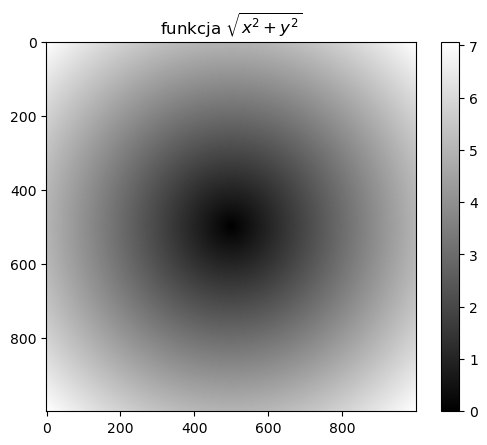

In [86]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("funkcja $\sqrt{x^2+y^2}$")

## Przykład 2

In [88]:
nsteps = 1000
draws= np.random.randint(0,2, size=nsteps)
print(draws)

[1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1
 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1
 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0
 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1
 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0
 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1
 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0
 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0
 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1
 1 0 1 0 1 0 0 0 0 0 0 0 

In [90]:
steps = np.where(draws > 0, 1, -1)
print(steps)

[ 1 -1  1  1  1  1 -1  1  1  1  1 -1  1 -1  1  1 -1  1  1 -1  1 -1 -1 -1
 -1 -1 -1 -1  1 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1  1 -1 -1  1  1 -1  1
 -1 -1 -1 -1  1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1
  1  1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1
  1  1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1  1  1
 -1  1  1  1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1
 -1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1 -1 -1
  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1  1 -1 -1
  1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1  1  1  1  1 -1 -1 -1  1 -1 -1  1  1
 -1  1 -1  1 -1  1 -1 -1  1  1 -1  1 -1 -1  1  1  1 -1  1 -1 -1  1 -1  1
  1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1 -1  1 -1 -1  1  1  1  1  1
 -1 -1 -1 -1  1 -1  1  1 -1  1 -1  1 -1 -1  1  1 -1  1 -1  1  1 -1  1 -1
 -1  1 -1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1 -1  1

In [92]:
walk = steps.cumsum()
print(walk)

[  1   0   1   2   3   4   3   4   5   6   7   6   7   6   7   8   7   8
   9   8   9   8   7   6   5   4   3   2   3   2   3   2   3   2   3   4
   5   4   5   4   3   4   3   2   3   4   3   4   3   2   1   0   1   0
   1   2   1   2   1   2   1   0  -1  -2  -3  -4  -3  -4  -3  -2  -1   0
   1   2   1   0  -1  -2  -1  -2  -1  -2  -3  -2  -1   0   1   0  -1  -2
  -3  -4  -3  -4  -5  -6  -5  -4  -3  -4  -3  -2  -1   0   1   2   1   0
  -1  -2  -3  -2  -3  -2  -3  -2  -3  -2  -1   0  -1   0   1   2   3   4
   3   4   5   6   7   6   7   6   5   4   3   2   3   4   5   6   7   8
   7   8   9  10   9  10   9   8   7   6   5   4   5   6   7   6   5   6
   5   6   5   4   3   2   1   0  -1  -2  -1  -2  -1   0   1   2   3   2
   1   2   1   2   1   0  -1   0  -1   0  -1  -2  -1   0  -1   0  -1  -2
  -3  -4  -5  -4  -5  -6  -7  -8  -9  -8  -7  -8  -9  -8  -7  -6  -7  -8
  -7  -8  -7  -6  -7  -6  -7  -8  -7  -8  -9 -10  -9  -8  -7  -6  -7  -8
  -9  -8  -9 -10  -9  -8  -9  -8  -9  -8  -9  -8  -

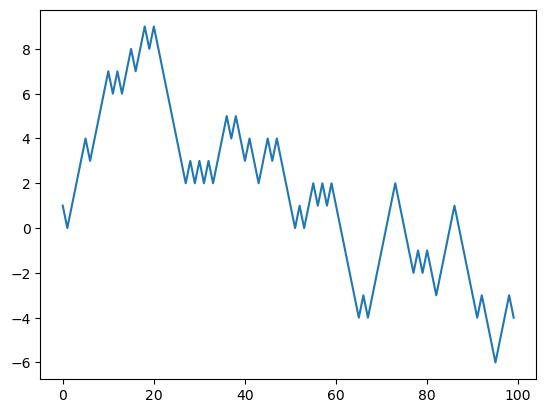

In [93]:
plt.plot(walk[:100])

Obszerny wykład:

https://www.youtube.com/watch?v=poD8ud4MxOY